# Week 4: Numerical integration with scipy

<hr/>

In [14]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# for numerical inegration
import scipy.integrate

# for pretty plots
import seaborn as sns
sns.set()

## Learning objectives 

- Conduct numerical integration with a built-in function from `scipy`
- Recall all the pieces you need for numerical integration
- Begin to explore the dynamics of a predator-prey model, being able to explain how it differs from the rabbit vs. sheep example we discussed before

## Introducing `scipy`

As we've seen, doing numerical integration ourselves can be kinda cumbersome. While the Euler method is the easiest to set up, it requires a very small time step, $\Delta t$ in order to be accurate. Higher-order integrations require fewer time steps, but are more technically challenging to set up. So we will now turn to a built-in function from `scipy`.

Below I show the pieces that go into doing numerical integration in Python. First we specify the equation for the *right-hand-side* (RHS) of our differential equations. Below I consider a simple system of two populations growing independently from each other, each with their won parameters of logistic growth:

$$\dot x = r_1 x \left( 1-\frac{x}{K_1} \right)$$

$$\dot y = r_2 y \left( 1-\frac{y}{K_2} \right)$$

In [2]:
def logistic_growth_rhs(xy, t, r1, K1, r2, K2):
    """
    Right hand side for logistic growth.
    Looking at two population silumtaneously 
    """
    # unpack the x and y values
    x, y = xy
    
    # Compute dx/dt
    dx_dt =  r1*x*(1-x/K1)
    
     # Compute dy/dt
    dy_dt =  r2*y*(1-y/K2)

    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt])

Next we specify all the pieces we'll need for the actual integration:
- The time points we want to integrate over
- The initial condition of our system
- The values of any of our parameters

We can then call our `scipy.integrat.odeint` fucntion which takes the following input in turn:
- The function that specifies our RHS equations, `logistic_growth_rhs` in this case
- Our array of the initial conditions, `xy_0`
- The array of time values, `t`
- And `args`, a tuple containing all of our parameters 

In [3]:
# Time points we want for the solution
t = np.linspace(0,10,1000)

# Initial conditions
xy_0 = np.array([1,1])

# Parameters
r1 = 2
K1 = 1000
r2 = 1.5
K2 = 2000 

# Package parameters into a tuple
args = (r1, K1, r2, K2)

# Integrate ODES
xy = scipy.integrate.odeint(logistic_growth_rhs, xy_0, t, args=args)

The results of the integration return a 2D array, `xy`, which looks like this:

In [4]:
xy

array([[1.00000000e+00, 1.00000000e+00],
       [1.02020116e+00, 1.01512064e+00],
       [1.04080992e+00, 1.03046977e+00],
       ...,
       [9.99997857e+02, 1.99874052e+03],
       [9.99997899e+02, 1.99875927e+03],
       [9.99997941e+02, 1.99877775e+03]])

Let's pause for a moment and think about how we might plot this information?

Text(0, 0.5, 'population size')

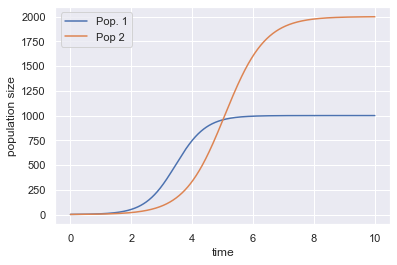

In [5]:
plt.plot(t,xy)
plt.legend(["Pop. 1", "Pop 2"])
plt.xlabel("time")
plt.ylabel("population size")

Text(0, 0.5, 'population size')

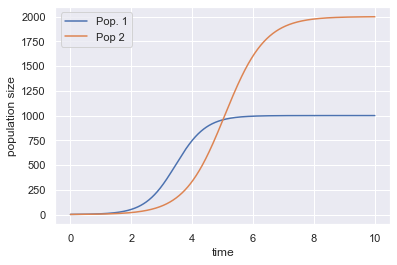

In [6]:
plt.plot(t, xy[: , 0])
plt.plot(t, xy[: , 1])
plt.legend(["Pop. 1", "Pop 2"])
plt.xlabel("time")
plt.ylabel("population size")

Now it's your turn! Returning to our example from Tuesday, let's now integrate this same system of equation with `scipy`.

Also, while I almost always advocate for writing code yourself, I did want to share this nice web applet that can nicely display the slope field and various trajectories, as another way to get a sense of how the system will be have over time:

https://aeb019.hosted.uark.edu/pplane.html

## Numerically integrating rabbits vs. sheep

As a reminder, here is the system of equations we used to represent rabbits, $x(t)$ and of sheep, $y(t)$: 

$$\dot x = x(3-x-2y)$$

$$\dot y = y(2-x-y)$$ 

Below, conduct the numerical integration with `scipy` and plot the results:

In [7]:
def rabbits_v_sheep_rhs(xy, t):
    """
    Right hand side for rabbits vs. sheep
    """
    # unpack the x and y values
    x, y = xy
    
    # Compute dx/dt
    dx_dt =  x*(3-x-2*y)
    
     # Compute dy/dt
    dy_dt =  y*(2-x-y)

    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt])

In [8]:
# Time points we want for the solution
t = np.linspace(0,10,1000)

# Initial conditions
xy_0 = np.array([3,3])

# Integrate ODES
xy = scipy.integrate.odeint(rabbits_v_sheep_rhs, xy_0, t)

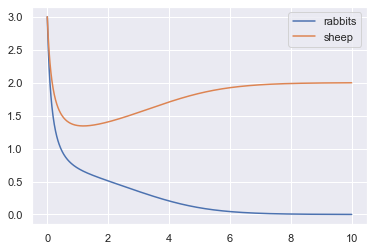

In [9]:
plt.plot(t, xy)
plt.legend(["rabbits","sheep"])

(0.0, 3.0)

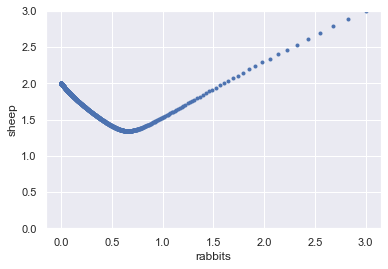

In [10]:
plt.plot(xy[:,0],xy[:,1],'.')
plt.xlabel("rabbits")
plt.ylabel("sheep")
plt.ylim([0,3])

## Thinking about rabbits vs. foxes

As an extension of the Lotka-Volterra model, let's now consider rabbits vs. foxes instead. A version of this looks like 

$$\dot{R}=a R-b R F$$

$$\dot{F}=-c F+d R F$$ 

To again get some intuition of how this system works:
- what is the meaning of each term? why does it have the sign that it does?
- how does this differ from the rabbits vs. sheep?
- how might this change the behavior?

If we have time, try to integrate this system over time. Think about the meaning of each parameter, and try to give an educated guess at their values.

In [11]:
def rabbits_v_foxes_rhs(xy, t, a, b, c, d):
    """
    Right hand side for logistic growth.
    Looking at two population silumtaneously 
    """
    # unpack the x and y values
    x, y = xy
    
    # Compute dx/dt
    dx_dt = a*x - b*x*y
    
     # Compute dy/dt
    dy_dt = -c*y + d*x*y

    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt])

In [12]:
# Time points we want for the solution
t = np.linspace(0,20,1000) 

# Initial conditions
xy_0 = np.array([1,1])

# Parameters
a = 10 
b = 2
c = 1
d = 0.1

# Package parameters into a tuple
args = (a, b, c, d)

# Integrate ODES
xy = scipy.integrate.odeint(rabbits_v_foxes_rhs, xy_0, t, args=args)

Text(0, 0.5, 'population size')

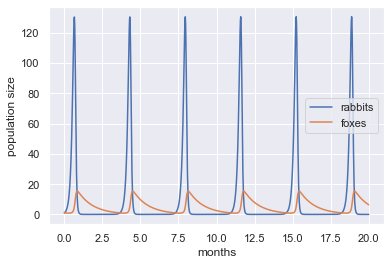

In [13]:
plt.plot(t, xy)
plt.legend(["rabbits","foxes"])
plt.xlabel("months")
plt.ylabel("population size")